In [1]:
#import modules

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [3]:
np.set_printoptions(suppress=True)

In [4]:
def load_data(filepath):
    df = pd.read_csv(filepath, delimiter=";")
    #scale real values
    for col in df.columns[:-1]:
        if df[col].dtype == int:
            df[col] = StandardScaler().fit_transform(np.array(df[col],dtype=np.float).reshape(-1,1)).reshape(1, -1).tolist()[0]
    #one hot encode categorical features
    columns = df.columns.tolist()
    obj_cols = [col for col in columns[:-1] if df[col].dtype==object]
    for col in obj_cols:
        df = pd.concat([pd.get_dummies(df[col], prefix=col), df], axis=1)#add dummies of a column
        df.drop(col, axis=1, inplace=True)#remove original column
    return df

In [5]:
df = load_data("bank.csv")

In [6]:
#divide features and labels

In [7]:
features = df[df.columns[:-1]]

In [8]:
labels = df.y

### Fit a LogisticRegression with l1 penalty

In [9]:
l1 = LogisticRegression(penalty='l1')

In [10]:
l1.fit(features[:4000], labels[:4000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
l1.score(features[4000:], labels[4000:])

0.89635316698656431

In [12]:
w1 = np.array(l1.coef_, copy=True)[0]

In [13]:
w1

array([-0.4315099 ,  0.        ,  1.88788027, -0.79985673, -0.01917859,
       -0.25997729,  0.        ,  0.14635049, -0.89898961, -0.72412982,
        0.37955276,  1.45455861, -0.51015363, -0.78800422,  1.23278621,
        0.24432321,  0.        , -0.05305378, -1.28240243,  0.        ,
       -0.6379399 ,  0.        , -0.32998617, -0.55339014,  0.        ,
       -0.00981545,  0.        ,  0.24139653, -0.66842165,  0.        ,
       -0.46328601, -0.32739629,  0.02774141, -0.41576634, -0.33397101,
       -0.20468278,  0.        ,  0.6484629 , -0.14180295,  0.0094336 ,
        0.32896309, -0.11429214, -0.67607177,  0.00172136, -0.06608876,
       -0.00352253,  0.09057777,  1.06783467, -0.1878933 , -0.04415232,
       -0.01121245])

### Fit a LogisticRegression with l2 penalty

In [14]:
l2 = LogisticRegression(penalty='l2')

In [15]:
l2.fit(features[:4000], labels[:4000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
l2.score(features[4000:], labels[4000:])

0.89635316698656431

In [17]:
w2 = np.array(l2.coef_, copy=True)[0]

In [18]:
w2

array([-0.71232643, -0.25488538,  1.58453071, -1.06438632, -0.12426636,
       -0.3438547 , -0.05569603,  0.14996812, -0.98190784, -0.79063471,
        0.3629576 ,  1.33655339, -0.57888349, -0.85663272,  1.14999737,
        0.28533195,  0.32884828,  0.20247418, -0.97838988,  0.10777439,
       -0.55484182, -0.05666004, -0.39040739, -0.49553736,  0.04846994,
       -0.01872229,  0.01353193,  0.28720469, -0.72908176,  0.13554957,
       -0.34638558, -0.23623141,  0.09912955, -0.38960045, -0.39169908,
       -0.27067022,  0.00781323,  0.70274621, -0.21587035,  0.08887033,
        0.42797932, -0.10108352, -0.7188414 ,  0.31415897, -0.06673858,
       -0.00385593,  0.10408938,  1.07404266, -0.19677726, -0.04137954,
       -0.01268118])

In [19]:
sum(abs(w2 - 0.0) < 0.000000000001)

0

In [20]:
sum(abs(w1 - 0.0) < 0.000000000001)

9

### The importance for 9 features in l1-regularized LR is null while achieving same metric measure as l2-regularized LR.

This can be used as a "feature elimination" method 

NOTE: The metric here is incorrect, as the dataset is highly screwed, 80:10 ratio of the given classes. So the "accuracy" of 89% doesn't mean anything. Since this article is about effects of l1 vs l2, we are going to ignore the choice of error function for screwed dataset, for now. But it shouldn't be like this in real life.

### Visualization
Plotting these feature weights gives us following fig.

In [21]:
from IPython.display import Image

In [22]:
from IPython.core.display import HTML , display

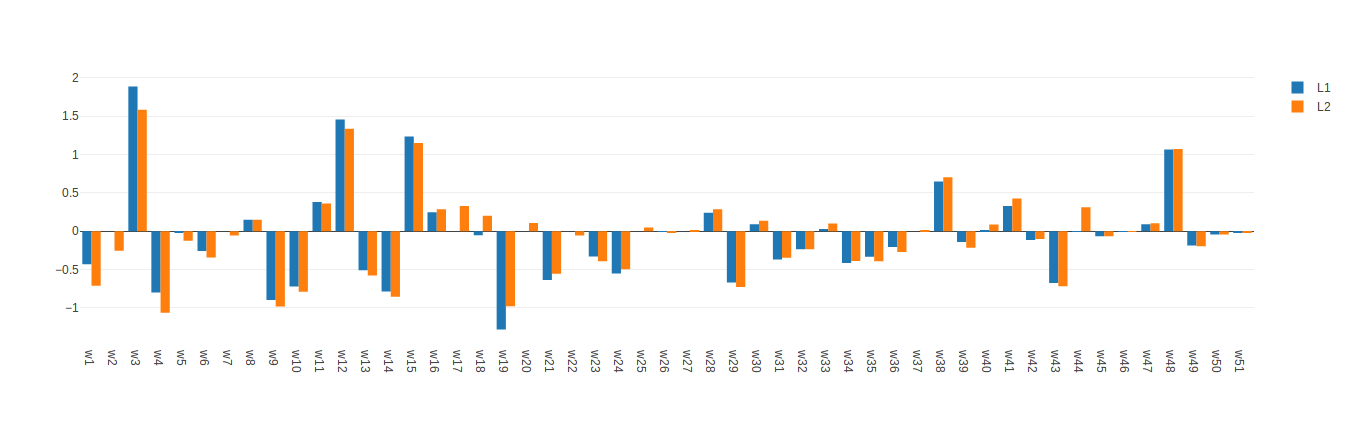

In [23]:
Image("l1l2.png")